In [1]:
from pathlib import Path

import pandas as pd

In [2]:
dates_to_visualize = [
                                                                                          # No TRANCO list available before 2018-12
                                                                                          # "2018-09", "2018-10", "2018-11", 
                                                                                                                             "2018-12",
    "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", 
    "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
    "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
    "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
    "2023-01", "2023-02",
    # "2024-02",
]

In [3]:
available_data_files = list(Path("../data/httparchive_metrics/nel_domain_resource_monitoring_stats").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-08.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_domain_resource_monitoring_stats/2019-10.parquet'),
 WindowsPath('../dat

### Load deployment data

In [4]:
available_deployment_files = list(Path("../data/httparchive_metrics/nel_deployment").glob("*.parquet"))

used_deployment_files = list(filter(lambda file: file.stem in dates_to_visualize, available_deployment_files))
used_deployment_files

[WindowsPath('../data/httparchive_metrics/nel_deployment/2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-08.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2020-01.parquet'),
 WindowsPath

In [5]:
import numpy as np
from results.result_utils import date_to_text_format, concat_data_from_files

deployment = concat_data_from_files(used_deployment_files)
        
deployment['total_crawled_domains'] = np.floor(pd.to_numeric(deployment['total_crawled_domains'], errors='coerce')).astype('UInt32')
deployment['total_crawled_domains_with_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_domains_with_nel'], errors='coerce')).astype('UInt32')
deployment['total_crawled_domains_with_correct_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_domains_with_correct_nel'], errors='coerce')).astype('UInt32')
        
deployment['total_crawled_resources'] = np.floor(pd.to_numeric(deployment['total_crawled_resources'], errors='coerce')).astype('UInt32') 
deployment['total_crawled_resources_with_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_resources_with_nel'], errors='coerce')).astype('UInt32') 
deployment['total_crawled_resources_with_correct_nel'] = np.floor(pd.to_numeric(deployment['total_crawled_resources_with_correct_nel'], errors='coerce')).astype('UInt32')
        
deployment["nel_percentage"] = \
        np.uint32(deployment['total_crawled_domains_with_correct_nel']) / np.uint32(deployment['total_crawled_domains']) * 100

deployment

,date,total_crawled_resources,total_crawled_domains,total_crawled_resources_with_nel,total_crawled_domains_with_nel,total_crawled_resources_with_correct_nel,total_crawled_domains_with_correct_nel,nel_percentage
0,2018-12,305842812,5291621,2862,384,2803,376,0.007106
0,2019-02,351105672,5707189,2592,382,2532,370,0.006483
0,2019-03,370358301,5790148,3607,391,3302,382,0.006597
0,2019-04,427771979,6690439,1897971,74600,1897583,74590,1.114875
0,2019-05,444564136,6950317,3726957,80904,3726553,80886,1.163774
0,2019-06,443671879,6965303,2925168,79235,2924495,79214,1.137266
0,2019-07,465370601,7160376,5279483,89049,5278664,89019,1.243217
0,2019-08,461754576,7144610,4746155,89576,4745184,89545,1.253322
0,2019-09,458489619,7140609,4741865,90328,4739949,90292,1.264486
0,2019-10,452597913,7110945,4766758,90679,4765585,90646,1.274739


### Load TRANCO Popular domain list


In [6]:
from src.metric_utils import load_tranco_list_from_custom_path

tranco_dict = {}
for month in dates_to_visualize:
    months_list = load_tranco_list_from_custom_path(Path("../resources"), *month.split('-'))
    tranco_dict[month] = months_list

tranco_dict[month]

,order,popular_domain_name
0,1,google.com
1,2,a-msedge.net
2,3,youtube.com
3,4,facebook.com
4,5,microsoft.com
...,...,...
999995,999996,zio.to
999996,999997,tostado.com.ar
999997,999998,comnewsvideo.jp
999998,999999,direweb.it


### Aggregate result to visualize

In [7]:
from results.result_utils import date_to_text_format, concat_data_from_files

result = concat_data_from_files(used_data_files)

result['date_formatted'] = result['date'].map(date_to_text_format)

result

,date,url_domain,url_domain_hosted_resources,url_domain_hosted_resources_with_nel,url_domain_monitored_resources_ratio,date_formatted
0,2018-12,0399c9e1dd3336042c83ac8958700768.report-uri.com,1,1,100.000000,Dec 2018
1,2018-12,0542a1319c75b4d97ce2156e1f1d6bc2.report-uri.com,1,1,100.000000,Dec 2018
2,2018-12,0d38c32709c097507fb7d35fbc48545e.report-uri.com,1,1,100.000000,Dec 2018
3,2018-12,1627f29bce741ebdc46108ecd8ebba3c.report-uri.com,1,1,100.000000,Dec 2018
4,2018-12,18d36df5be4d2f0680090c55b489865d.report-uri.com,1,1,100.000000,Dec 2018
...,...,...,...,...,...,...
2258974,2023-02,zzzw.de,63,62,98.410004,Feb 2023
2258975,2023-02,zzzz.bg,6,6,100.000000,Feb 2023
2258976,2023-02,zzzz.tw,42,42,100.000000,Feb 2023
2258977,2023-02,zzzzap.nl,37,37,100.000000,Feb 2023


### Filter result data to popular reporting domains

In [8]:
popular_result = pd.DataFrame({})
for month in dates_to_visualize:
    month_result = result[result['date'] == month]
    
    month_result = month_result[month_result['url_domain'].isin(tranco_dict[month]['popular_domain_name'])]
    month_result.reset_index(drop=True, inplace=True)
    
    popular_result = pd.concat([popular_result, month_result])
    
popular_result

,date,url_domain,url_domain_hosted_resources,url_domain_hosted_resources_with_nel,url_domain_monitored_resources_ratio,date_formatted
0,2018-12,flightplandatabase.com,1,1,100.000000,Dec 2018
1,2018-12,helgeklein.com,28,5,17.860001,Dec 2018
2,2018-12,linustechtips.com,131,90,68.699997,Dec 2018
3,2018-12,nodecraft.com,94,1,1.060000,Dec 2018
4,2018-12,promods.net,55,53,96.360001,Dec 2018
...,...,...,...,...,...,...
77986,2023-02,zztt86.com,1,1,100.000000,Feb 2023
77987,2023-02,zzup.com,67,67,100.000000,Feb 2023
77988,2023-02,zzztube.com,13,13,100.000000,Feb 2023
77989,2023-02,zzztube.tv,11,11,100.000000,Feb 2023


### NEL Deployment on POPULAR domains

In [9]:
from results.result_utils import get_first_or_0

# result[['date', 'total_crawled_domains', 'total_crawled_domains_with_correct_nel', 'nel_percentage']]
deployment_result = pd.DataFrame({})
for month in dates_to_visualize:
    month_data = popular_result[popular_result['date'] == month].copy()
    
    month_result = pd.DataFrame({})
    
    month_result['date'] = [date_to_text_format(month)]
    month_result['total_crawled_domains'] = deployment[deployment['date'] == month]['total_crawled_domains']
    month_result['total_popular_crawled_domains_with_correct_nel'] = month_data['url_domain'].unique().size
    month_result['domain_nel_percentage'] = month_result['total_popular_crawled_domains_with_correct_nel'] / month_result['total_crawled_domains'] * 100
    
    month_result['total_crawled_resources'] = deployment[deployment['date'] == month]['total_crawled_resources']
    month_result['total_popular_crawled_resources_with_correct_nel'] = month_data['url_domain_hosted_resources_with_nel'].astype('UInt64').sum()
    month_result['resource_nel_percentage'] = month_result['total_popular_crawled_resources_with_correct_nel'] / month_result['total_crawled_resources'] * 100
    
    deployment_result = pd.concat([month_result, deployment_result])
    
deployment_result = deployment_result.sort_values(by=['date'])
deployment_result

,date,total_crawled_domains,total_popular_crawled_domains_with_correct_nel,domain_nel_percentage,total_crawled_resources,total_popular_crawled_resources_with_correct_nel,resource_nel_percentage
0,Apr 2019,6690439,4790,0.071595,427771979,18599,0.004348
0,Apr 2020,7074815,5964,0.084299,431681932,34800,0.008061
0,Apr 2021,10099360,57600,0.570333,621806695,3171515,0.510048
0,Apr 2022,10791931,74191,0.687467,646175019,4917213,0.760972
0,Aug 2019,7144610,4981,0.069717,461754576,24659,0.00534
0,Aug 2020,9563066,5324,0.055673,585337536,115558,0.019742
0,Aug 2021,10853971,61146,0.563351,646957318,3290346,0.508588
0,Aug 2022,19762235,73453,0.371684,1630486590,7643902,0.468811
0,Dec 2018,5291621,9,0.00017,305842812,214,0.00007
0,Dec 2019,7058154,5668,0.080304,454142906,29086,0.006405


<Axes: xlabel='date', ylabel='total_popular_crawled_domains_with_correct_nel'>

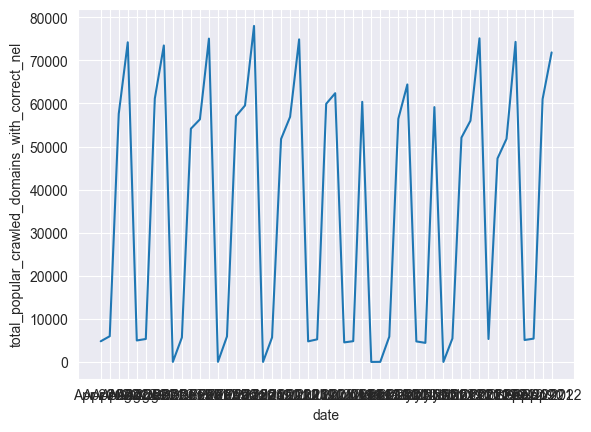

In [10]:
import seaborn as sns

sns.lineplot(deployment_result, x='date', y='total_popular_crawled_domains_with_correct_nel')